# Inaugural Project

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as model
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve this model, we started by defining the given values for both alpha and sigma. After that, we created two arrays that can store the values for HF and HM.

Next, we created a for loop that would loop through the alpha values and, for each alpha value, run through all the sigma values. This allowed us to obtain all the different combinations of alpha and sigma values.

Within the for loop, we used the solve_discrete model which was given, and from this, we calculated the values for HF and HM and stored them in the empty arrays.

Finally, we plotted HF/HM against the sigma values.

In [196]:
import numpy as np
from tabulate import tabulate

alpha_vals = np.array([0.25, 0.5, 0.75])
sigma_vals = np.array([0.5, 1.0, 1.5])

HF_vals = np.zeros((len(alpha_vals), len(sigma_vals)))
HM_vals = np.zeros((len(alpha_vals), len(sigma_vals)))

for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        # Solve model for each combination of alpha and sigma
        hsm.par.alpha = alpha
        hsm.par.sigma = sigma
        opt = hsm.solve_discrete()
        HF_vals[i, j] = opt.HF
        HM_vals[i, j] = opt.HM

table = []
header_sigma = [""] + ["Sigma = 0.5"] + ["Sigma = 1.0"] + ["Sigma = 1.5"]

for i, alpha in enumerate(alpha_vals):
    row = [f"Alpha = {alpha}"] + [f"{HF_vals[i, j] / HM_vals[i, j]:.2f}" for j in range(len(sigma_vals))]
    table.append(row)

print(tabulate(table, headers=header_sigma, tablefmt="grid"))

+--------------+---------------+---------------+---------------+
|              |   Sigma = 0.5 |   Sigma = 1.0 |   Sigma = 1.5 |
+==============+===============+===============+===============+
| Alpha = 0.25 |          0.55 |          0.31 |          0.21 |
+--------------+---------------+---------------+---------------+
| Alpha = 0.5  |          1    |          1    |          1    |
+--------------+---------------+---------------+---------------+
| Alpha = 0.75 |          1.83 |          3.25 |          4.67 |
+--------------+---------------+---------------+---------------+


# Question 2

When creating a discrete model, we began by developing the code to solve_wF_vec. In this case, when the model needs to be solved, it references another code, depending on whether discrete is true or false. 

The resulting outputs from this code are then stored and used to generate the code below, which calculates the logarithm of returns and plots them accordingly.

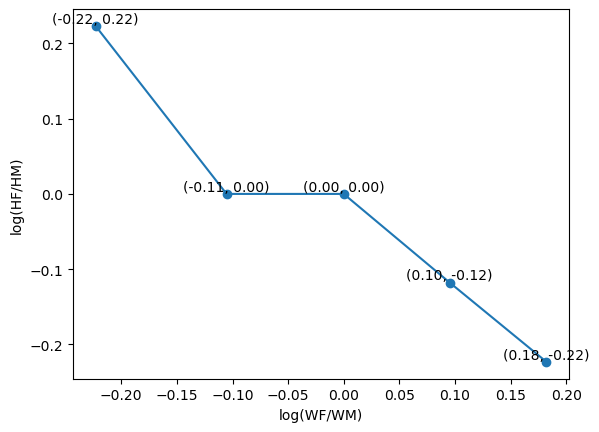

In [197]:
# Instantiate the model
Mo = model.HouseholdSpecializationModelClass()

# Initialize lists to store the logarithmic values
wage_log = []
house_prod_log = []

# Iterate over the values in Mo.par.wF_vec
for wF in Mo.par.wF_vec:
    # Set the female wage
    Mo.par.wF = wF
    
    # Solve the model and obtain the optimization results
    Optimize = Mo.solve_discrete()
    
    # Calculate the logarithmic values
    wage_log.append(np.log(Mo.par.wF / Mo.par.wM))
    house_prod_log.append(np.log(Optimize.HF / Optimize.HM))

# Plot the data points
plt.plot(wage_log, house_prod_log, '-o')

# Set axis labels
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')

# Add labels to the data points
for x, y in zip(wage_log, house_prod_log):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', ha='center', va='bottom')

# Show the plot
plt.show()


From the graph above we see that while there is a general negative relationship between the HF/HM ratio and the WF/WM ratio, there is no change in HF/HM, when the wage of females is increased from 0.9 to 1.0. This result seems peculiar and might be a product of our analysis being in discrete time. 

# Question 3

We begin by defining the values for wF. Subsequently, a for loop iterates through each value of wF. Within this loop, the solve function from hsm is used to define an objective function to minimize, along with providing initial guesses for the solver. After solving the optimization problem, the optimal choices are saved. Once all iterations of the loop have completed and the optimal values have been saved, a plot can be generated, as demonstrated below.

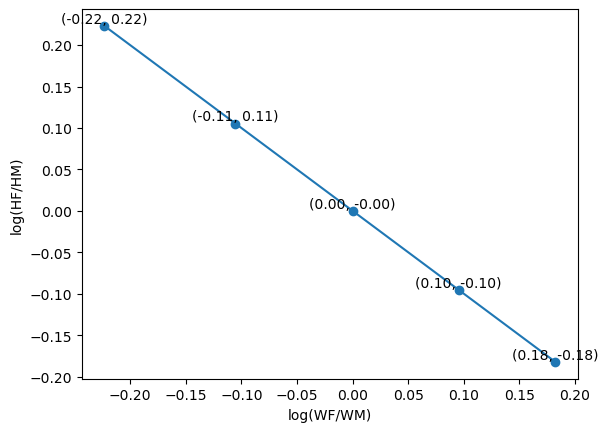

In [198]:
# Instantiate the model
Mo = model.HouseholdSpecializationModelClass()

# Initialize lists to store the logarithmic values
wage_log_continous = []
house_prod_log_continous = []

# Iterate over the values in Mo.par.wF_vec
for wF in Mo.par.wF_vec:
    # Set the female wage
    Mo.par.wF = wF
    
    # Solve the model and obtain the optimization results
    Optimize = Mo.solve()
    
    # Calculate the logarithmic values
    wage_log_continous.append(np.log(Mo.par.wF/Mo.par.wM))
    house_prod_log_continous.append(np.log(Optimize.HF/Optimize.HM))

# Plot the data points
plt.plot(wage_log_continous, house_prod_log_continous, '-o')

# Set axis labels
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')

# Add labels to the data points
for x, y in zip(wage_log_continous, house_prod_log_continous):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', ha='center', va='bottom')

# Show the plot
plt.show()

From this graph we see that there is a strictly negative relationship between the HF/HM ratio and the WF/WM ratio, no matter the increase in WF. This result relates to that of question two where we theorized that there might be differences between discrete and continuous time. 

# Question 4

First, several variables are defined including regression coefficients (beta0, beta1), weights (wM, wF), and dependent variable (log_HFHM). Then an objective function objective(x) is defined that takes two inputs, alpha and sigma, and returns the sum of squared residuals obtained from a linear regression model with coefficients beta0, beta1, and alpha, and normally distributed error term with standard deviation sigma.

Next, an initial guess for the values of alpha and sigma is set (x0). The minimize function is called with objective function, the initial guess (x0), and the optimization method (method='Powell'). The Powell method does not require the gradient of the objective function to be calculated and can handle nonlinear functions.

Finally, the optimization results are printed, including the optimized values for alpha and sigma (result.x[0] and result.x[1], respectively), the function value at the minimum (result.fun), whether the optimization succeeded (result.success), and the optimization message (result.message).

In [199]:
# Running the 'estimate' def in the inauguralproject.py
hsm.estimate(do_print=True)
hsm.par.alpha = hsm.sol.alpha
hsm.par.sigma = hsm.sol.sigma

/Users/christopher/projects-2023-2x-chris-og-ras-1/inauguralproject/inauguralproject.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/christopher/projects-2023-2x-chris-og-ras-1/inauguralproject/inauguralproject.py:62: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Optimization results:
Alpha: 0.98
Sigma: 0.10
Residual value: 0.00
Success: True
Message: Optimization terminated successfully.


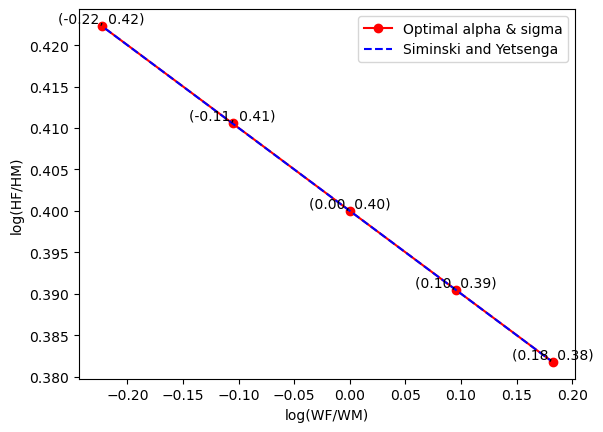

In [200]:
# Initialize lists to store the logarithmic values
wage_log_continous = []
house_prod_log_continous = []

# Iterate over the values in Mo.par.wF_vec
for wF in hsm.par.wF_vec:
    # Set the female wage
    hsm.par.wF = wF
    
    # Solve the model and obtain the optimization results
    Optimize = hsm.solve()
    
    # Calculate the logarithmic values
    wage_log_continous.append(np.log(hsm.par.wF/hsm.par.wM))
    house_prod_log_continous.append(np.log(Optimize.HF/Optimize.HM))

x = np.linspace(-0.22,0.18,2)
y = hsm.par.beta0_target + hsm.par.beta1_target*x

# Plot the data points
plt.plot(wage_log_continous, house_prod_log_continous, '-o', label='Optimal alpha & sigma', color='r')
plt.plot(x,y,'--', label='Siminski and Yetsenga', color='blue')
plt.legend()

# Set axis labels
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')

# Add labels to the data points
for x, y in zip(wage_log_continous, house_prod_log_continous):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', ha='center', va='bottom')

# Show the plot
plt.show()

We here find the development in the two ratios, given that we optimize the utility function with regards to sigma and alpha. When comparing this result to that of Siminiski and Yetsenga (2022), we see, that the optimal parameters seem to be extremely similar to the empirical findings. Thus, it seems empirically that when the wage ratio between females and males increases by 1%, the ratio of work in the household only decreases with 0,4%. This indicates that whilst the increase in wage naturally decreases the amount of time women spend on work in the household, the increase and decrease are not proportional. This is also what we have assumed in the theoretical model, where we have that women are far more productive in the household work due to the high value of alpha, which means that a proportional decrease in household work is not optimal. 

# Question 5

In the modified code, a new component called inequality_aversion is introduced. It represents the inequality aversion in household production and is calculated as the square of the difference between the female home production (HF) and the male home production (HM), multiplied by a parameter lambda_ineq. You can adjust the value of lambda_ineq to determine the weight assigned to inequality aversion in the utility calculation. By subtracting the inequality_aversion component from the utility, households that have a smaller difference between male and female home production will have higher utility, reflecting a preference for more equal distribution of household production tasks.

In [201]:
hsm.par.lambda_ineq = 0.1

# Running the 'estimate' def in the inauguralproject.py
hsm.estimate5(do_print=True)
hsm.par.alpha = hsm.sol.alpha
hsm.par.sigma = hsm.sol.sigma

Optimization results:
Alpha: 0.50
Sigma: 1.00
Residual value: 0.17
Success: True
Message: Optimization terminated successfully.


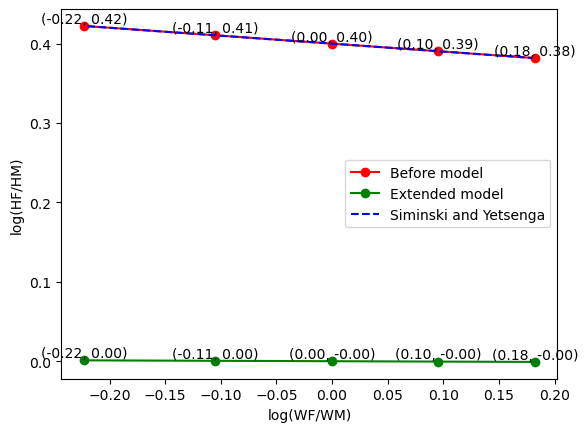

In [203]:
# Initialize lists to store the logarithmic values
wage_log_continous5 = []
house_prod_log_continous5 = []

# Iterate over the values in Mo.par.wF_vec
for wF in hsm.par.wF_vec:
    # Set the female wage
    hsm.par.wF = wF
    
    # Solve the model and obtain the optimization results
    Optimize = hsm.solve5()
    
    # Calculate the logarithmic values
    wage_log_continous5.append(np.log(hsm.par.wF/hsm.par.wM))
    house_prod_log_continous5.append(np.log(Optimize.HF/Optimize.HM))

x = np.linspace(-0.22,0.18,2)
y = hsm.par.beta0_target + hsm.par.beta1_target*x

# Plot the data points
plt.plot(wage_log_continous, house_prod_log_continous, '-o', label='Before model', color='r')
plt.plot(wage_log_continous5, house_prod_log_continous5, '-o', label='Extended model', color='green')
plt.plot(x,y,'--', label='Siminski and Yetsenga', color='blue')
plt.legend()

# Set axis labels
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')

# Add labels to the data points
for x, y in zip(wage_log_continous, house_prod_log_continous):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', ha='center', va='bottom')

for x, y in zip(wage_log_continous5, house_prod_log_continous5):
    plt.text(x, y, f'({x:.2f}, {y:.2f})', ha='center', va='bottom')

# Show the plot
plt.show()